# Feature Engineering (Project Part 1/3)

## Author - Rodolfo Lerma

# Problem

Explore the data from the "diaper" manufacturer, clean it, handle the class imbalance problem and apply feature selection techniques to reduce dimensionality.

# Abstract:

The capstone project focuses on diaper manufacturing quality. Generally, to ensure or predict quality, a diaper manufacturer need s to monitor every step of the manufacturing process with sensors such as heat sensors, glue sensors, glue level, etc.
For this capstone project, we will use the SECOM manufacturing Data Set from the UCI Machine Learning Repository.

The analysis is is divided the following way:

### Data exploration.
- **Merging Data**
- **Cleaning Data**
    - Missing Values
    - Repeated Values (Columns with the same value)
- **Preliminary Visual Exploration**
     - `target` Time Distribution
     - Exploration of `target` variable
     - Exploration of the first 5 features

### Feature Selection.
- **Correlation**
- **Mutual Information**
    - Visual exploration of features with higher mi value
- **Stepwise Model Selection**
- **LASSO**

### Evaluation of the Features for Future Models.
- **Train & Test Model**
- **Split Data and Class Imbalance**
- **Evaluate Model Performance**
    - Model using using Filter Methods
    - Model using using Wrapper Methods
    - Model using using Embedded Methods
- **Comparison**

### Summary/Conclusions.

# Data Exploration

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Load File
filename = 'secom.data'
filename2 = 'secom_labels.data'
data = pd.read_csv(filename,header=None, sep = '\s+')
others = pd.read_csv(filename2,header=None,sep = '\s+')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [4]:
data.shape

(1567, 590)

In [5]:
others.head()

,0,1
0,-1,19/07/2008 11:55:00
1,-1,19/07/2008 12:32:00
2,1,19/07/2008 13:17:00
3,-1,19/07/2008 14:43:00
4,-1,19/07/2008 15:22:00


In [6]:
others.shape

(1567, 2)

## Merging Data

In [7]:
others.columns = ['target', 'date']
df = pd.concat([others,data], axis = 1)
df.shape

(1567, 592)

In [8]:
df.head()

,target,date,0,1,2,3,4,5,6,7,...,580,581,582,583,584,585,586,587,588,589
0,-1,19/07/2008 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,-1,19/07/2008 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,1,19/07/2008 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,-1,19/07/2008 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,-1,19/07/2008 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


In [9]:
df['target'].unique()

array([-1,  1], dtype=int64)

In [10]:
df['date']= pd.to_datetime(df['date'])

## Cleaning Data

### Missing Values

In [11]:
missing_values = []
my_list = df.columns.values.tolist()
y = df.shape
for i in my_list:
    x = df[i].isnull().sum()
    missing_values.append(x)
    
columns_missing = dict(zip(my_list, missing_values))
a = sorted(columns_missing.items(), key=lambda x: x[1], reverse = True)  

If more than 15% of data is missing in a column that column would be dropped from this data set at this moment. For other columns with missing data is present depending on how much data is missing is going to be either dropped or imputed.

In [12]:
missing_columns_names = []
for key, value in columns_missing.items():
    if value > 240: #15% of the data
        x = key
        missing_columns_names.append(x)

Those columns would be eliminated from the data set, since most of the values are missing.

In [13]:
df = df.drop(missing_columns_names, axis = 1)

In [14]:
df.shape

(1567, 540)

In [15]:
df = df.dropna()

In [16]:
df.shape

(1393, 540)

For this analysis since removing missing data would only take 10% of the available data, those raws are going to be remove. If by removing missing data more than 15% were to be removed other methods would have been explored as: substitution.

Even at this moment having 540 variables/features is to much to explore and obtain meaninful results, therefore more work has to be done.

In [17]:
d = df.describe()
d

,target,0,1,2,3,4,5,6,7,8,...,576,577,582,583,584,585,586,587,588,589
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.0,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000
mean,-0.857861,3014.966274,2494.861981,2200.348900,1384.417093,2.928322,100.0,101.231608,0.122246,1.465172,...,5.582219,16.434664,0.500049,0.015366,0.003858,3.078235,0.021743,0.016454,0.005279,98.088611
std,0.514067,74.195555,81.555556,29.825001,415.755060,42.128656,0.0,5.900409,0.004998,0.072696,...,16.870333,12.336507,0.003426,0.018124,0.003930,3.776211,0.012602,0.008801,0.002865,92.838412
min,-1.000000,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,...,0.663600,4.582000,0.477800,0.006000,0.001700,1.197500,-0.006000,0.003200,0.001000,0.000000
25%,-1.000000,2966.240000,2450.890000,2180.966600,1084.377900,1.016000,100.0,98.131100,0.121100,1.412500,...,1.426700,11.280000,0.497900,0.011600,0.003100,2.305500,0.013600,0.010600,0.003300,44.175400
50%,-1.000000,3011.840000,2498.770000,2201.066700,1285.214400,1.307600,100.0,101.666700,0.122400,1.462900,...,1.637600,13.733200,0.500100,0.013800,0.003600,2.760200,0.020800,0.014800,0.004600,71.084200
75%,-1.000000,3057.450000,2538.740000,2218.577800,1588.509000,1.518800,100.0,104.586700,0.123800,1.518600,...,1.910700,17.002800,0.502300,0.016400,0.004100,3.284400,0.027700,0.020300,0.006400,113.550600
max,1.000000,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,...,90.423500,96.960100,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800


From here it is possible to see that there are some features that do not add to the analysis as the value does to change. Those are going to be removed as well.

### Repeated Values (Columns with the same value)

In [18]:
not_repeated = []
repeated = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns[2:]:
    x = df[i].std()
    if x == 0:
        repeated.append(i)
    else:
        not_repeated.append(i)

In [19]:
df = df.drop(repeated, axis = 1)

In [20]:
categorical = []
numerical = []
updated_columns = df.columns.values.tolist()
y = df.shape
for i in updated_columns:
    x = df[i].dtypes
    if x == object:
        categorical.append(i)
    else:
        numerical.append(i)

Thru the code above the data was checked to see if there was any variable that could be considered as categorical (also this helped to checked any column with incorrect values)

## Visual Exploration

### `target` Time Distribution

In [21]:
df2 = df.copy()
df2.index = df2['date']

In [22]:
x = df2[["target"]].resample("4W").mean()

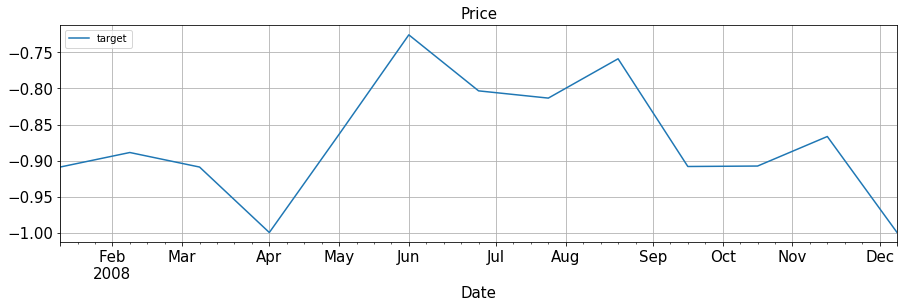

In [23]:
x.plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Price',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

In [24]:
print("Minimal Date=%s, Maximal Date=%s"%(min(df["date"]).strftime("%Y-%m-%d"), \
                                          max(df["date"]).strftime("%Y-%m-%d")))



Minimal Date=2008-01-08, Maximal Date=2008-12-10


### Exploration of `target` variable

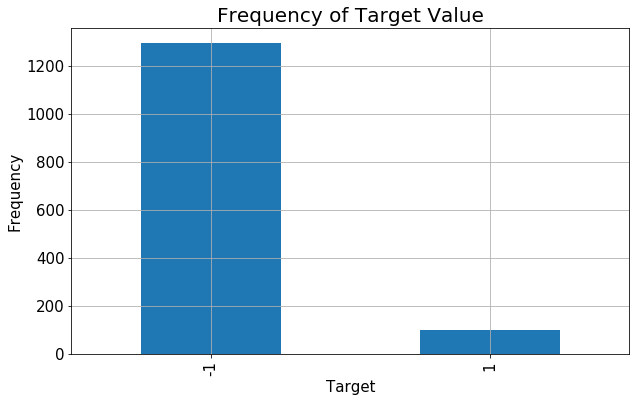

In [25]:
df.target.value_counts().plot(kind='bar',figsize = (10,6))
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Frequency of Target Value', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

In [26]:
df.target.value_counts()

-1    1294
 1      99
Name: target, dtype: int64

### Exploration of the first 5 features

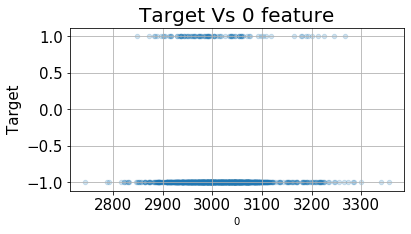

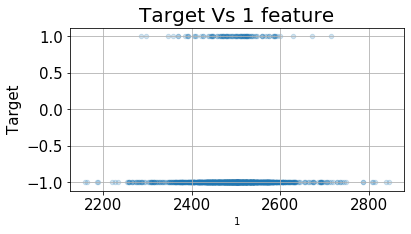

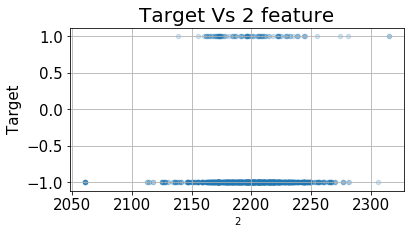

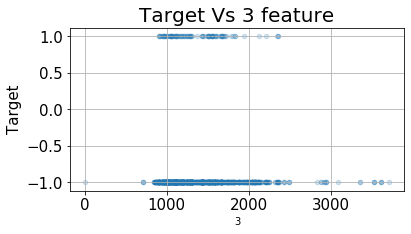

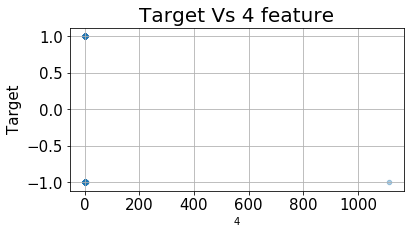

In [27]:
df_num = df[numerical]

df_num_col = df_num.iloc[:,2:7]

for i in df_num_col:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(6, 3)).gca() # define axis
    df.plot.scatter(x = i, y = 'target', ax = ax, alpha = 0.2)
    ax.set_title('Target Vs ' + str(i) + ' feature', fontsize = 20) # Give the plot a main title
    ax.set_ylabel('Target', fontsize = 15)# Set text for y axis
    #ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

By looking at the data it is clear to see that a **class imbalance** might be induce by introducing this variables to the model.

# Feature Selection

## Correlation

In [28]:
correlations_df = df[numerical].corr()
df_correlations = correlations_df['target']
df_correlations = pd.DataFrame(data=df_correlations)
df_correlations['Corr_Abs'] = abs(df_correlations['target'])

In [29]:
min_corr = min(df_correlations['Corr_Abs'])
max_corr = max(df_correlations['Corr_Abs'][1:])

print('Max correlation value is = ' + str(round(max_corr, 4)))
print('Min correlation value is = ' + str(round(min_corr, 4)))

Max correlation value is = 0.1627
Min correlation value is = 0.0001


As it is possible to see the correlation values are small in general.

In [30]:
#list: High correlation and low correlation
df_correlations.reset_index(inplace=True)
high_correlated_features = []
low_correlated_features = []
for i in range(len(df_correlations['Corr_Abs'])):
    p = df_correlations.iloc[i,2]
    if p >= 0.05:
        l = df_correlations.iloc[i,0]
        high_correlated_features.append(l)
    else:
        r = df_correlations.iloc[i,0]
        low_correlated_features.append(r)

In [31]:
high_correlated_features.remove('target')

## Mutual Information

In [32]:
from sklearn.metrics import mutual_info_score
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [33]:
mutual_values = []
df_numeric = df[numerical]
df_numeric = df_numeric.drop('date', axis = 1)

In [34]:
for i in range(len(df_numeric.iloc[1])):
    X = df_numeric.iloc[:,i].tolist()
    Y = df_numeric.iloc[:,0].tolist()
    mi = calc_MI(X, Y, 20)
    mutual_values.append(mi)

In [35]:
my_list_mutual = df_numeric.columns.values.tolist()    
mutual_info_dict = dict(zip(my_list_mutual, mutual_values))
mutual_info_dict_sorted = sorted(mutual_info_dict.items(), key=lambda x: x[1], reverse = True)
df_correlations['Mutual_info'] = mutual_values

In [36]:
min_mi = min(df_correlations['Mutual_info'])
max_mi = max(df_correlations['Mutual_info'][1:])

print('Max mi value is = ' + str(round(max_mi, 4)))
print('Min mi value is = ' + str(round(min_mi, 4)))

Max mi value is = 0.0219
Min mi value is = 0.0001


In [37]:
#List: High mi and low mi
high_mi_features = []
low_mi_features = []
for i in range(len(df_correlations['Mutual_info'])):
    w = df_correlations.iloc[i,3]
    if w >= 0.01:
        q = df_correlations.iloc[i,0]
        high_mi_features.append(q)
    else:
        k = df_correlations.iloc[i,0]
        low_mi_features.append(k)

In [38]:
high_mi_features.remove('target')

In [39]:
len_mi = len(high_mi_features)
print('# of Features using MI: ' + str(len_mi))

# of Features using MI: 49


In [40]:
elements_in_both = sum(x in high_correlated_features for x in high_mi_features)
elements_in_both

26

### Visual exploration of features with higher mi value

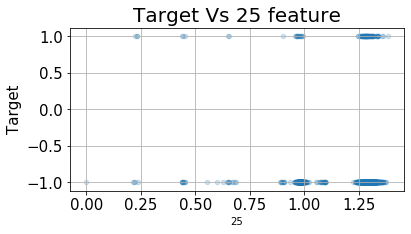

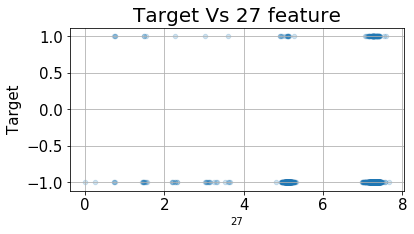

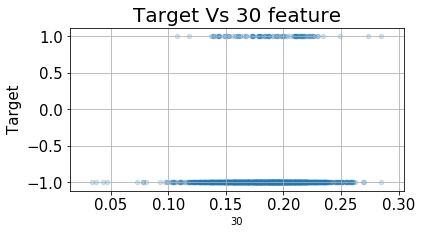

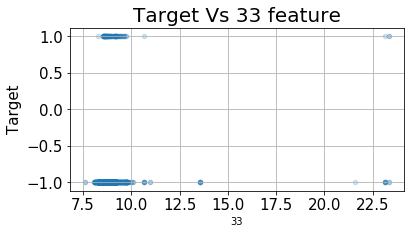

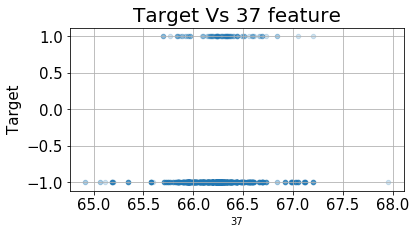

In [41]:
columns = high_mi_features[0:5]

for i in columns:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(6, 3)).gca() # define axis
    df.plot.scatter(x = i, y = 'target', ax = ax, alpha = 0.2)
    ax.set_title('Target Vs ' + str(i) + ' feature', fontsize = 20) # Give the plot a main title
    ax.set_ylabel('Target', fontsize = 15)# Set text for y axis
    #ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

## Stepwise Model Selection

In [42]:
# Recursive Feature Elimination
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

In [43]:
estimator = LinearRegression()
selector = RFE(estimator, 50, step=1)

C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass n_features_to_select=50 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [44]:
df_numeric_copy = df_numeric.copy()

In [45]:
target = df_numeric.iloc[:,0]#This is the selection of the Target Variables
df_updated = df_numeric_copy.drop('target', axis='columns')

In [46]:
lol = df_updated.values.tolist()
selector = selector.fit(lol, target)

In [47]:
boolean_values = selector.support_
ranking_values = selector.ranking_
wrapper_columns = df_updated.columns.values.tolist()

In [48]:
#Selection of the features with ranking 1
selected_features = []
unselected_features = []
for i in range(len(wrapper_columns)):
    w = boolean_values[i]
    if w == True:
        b = wrapper_columns[i]
        selected_features.append(b)
    else:
        v = wrapper_columns[i]
        unselected_features.append(v)

In [49]:
len_selected = len(selected_features)
print('# of Features using BACKWARD: ' + str(len_selected))

# of Features using BACKWARD: 50


## LASSO

In [50]:
# LASSO
from sklearn import linear_model
alpha = 0.001 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)

In [51]:
clf.fit(lol, target)
lasso_coef = clf.coef_
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

Sum of square of coefficients = 0.51


C:\Users\ly266e\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.60370931752587, tolerance: 0.03678564249820537
  positive)


In [52]:
#Selection of the non zero coefficients from the LASSO regression
lasso_features = []
non_lasso_features = []
for i in range(len(wrapper_columns)):
    w = lasso_coef[i]
    if w != 0:
        u = wrapper_columns[i]
        lasso_features.append(u)
    else:
        t = wrapper_columns[i]
        non_lasso_features.append(t)

In [53]:
len_lasso = len(lasso_features)
print('# of Features using LASSO: ' + str(len_lasso))

# of Features using LASSO: 209


# Evaluation of the Features for Future Models

## Train & Test Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [55]:
#Parameters for Classifiers
k = 5 # number of neighbors
distance_metric = 'euclidean'
estimators = 10 # number of trees parameter
mss = 2 # mininum samples split parameter

#Classifiers
knn = KNeighborsClassifier(n_neighbors=k, metric=distance_metric) #K Nearest Neighbors

#List for Classifiers and Names
header = ["K_Nearest_Neighbors"]
V = [knn]

In [56]:
tr = df.iloc[:,0].tolist()
binomial = []
for i in range(len(tr)):
    b = tr[i]
    if b < 0:
        n = 0
    else:
        n = 1
    binomial.append(n)
df['target_binomial'] = binomial

## Split Data and Class Imbalance

### Split Data

In [57]:
#Split the data for variables with high mi value
label = df['target_binomial']
correlation_variables = df[high_correlated_features]
mi_variables = df[high_mi_features]
stepwise_variables = df[selected_features]
lasso_variables = df[lasso_features]

In [58]:
X_train_mi, X_test_mi, y_train_mi, y_test_mi = train_test_split(mi_variables, label, test_size=0.30, random_state=42)
X_train_sp, X_test_sp, y_train_sp, y_test_sp = train_test_split(stepwise_variables, label, test_size=0.30, random_state=42)
X_train_la, X_test_la, y_train_la, y_test_la = train_test_split(lasso_variables, label, test_size=0.30, random_state=42)

### Class Imbalance

In [59]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 

In [60]:
sm = SMOTE(random_state=42)

In [61]:
variables_mi_sm, label_mi_sm = sm.fit_resample(mi_variables, label)
variables_sp_sm, label_sp_sm = sm.fit_resample(stepwise_variables, label)
variables_la_sm, label_la_sm = sm.fit_resample(lasso_variables, label)

In [62]:
#Split the data
X_train_mi_sm, X_test_mi_sm, y_train_mi_sm, y_test_mi_sm = train_test_split(variables_mi_sm, label_mi_sm, test_size=0.30, random_state=42)
X_train_sp_sm, X_test_sp_sm, y_train_sp_sm, y_test_sp_sm = train_test_split(variables_sp_sm, label_sp_sm, test_size=0.30, random_state=42)
X_train_la_sm, X_test_la_sm, y_train_la_sm, y_test_la_sm = train_test_split(variables_la_sm, label_la_sm, test_size=0.30, random_state=42)

## Evaluate Model Performance

In [63]:
from sklearn.metrics import *
def ROM_plots(T,y):
    # ROC analysis
    LW = 2.0 # line width for plots
    LL = "lower right" # legend location
    LC = 'orange' # Line Color
    fpr, tpr, th = roc_curve(T, y) # False Positive Rate, True Posisive Rate, probability thresholds
    AUC = auc(fpr, tpr)
    #print ("\nTP rates:", np.round(tpr, 2))
    #print ("\nFP rates:", np.round(fpr, 2))
    #print ("\nProbability thresholds:", np.round(th, 2))
    plt.figure()
    plt.title('Receiver Operating Characteristic curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPT')
    plt.ylabel('TPR')
    plt.plot(fpr, tpr, color=LC,lw=LW, label='ROC curve (area = %0.2f)' % AUC)
    plt.plot([0, 1], [0, 1], color='navy', lw=LW, linestyle='--') # reference line for random classifier
    plt.legend(loc=LL)
    plt.show()
    #print ("\nAUC score (using auc function):", np.round(AUC, 2))
    #print ("\nAUC score (using roc_auc_score function):", np.round(roc_auc_score(T, y), 2), "\n")

#unction to calculate performance parameters based on Predictions and Actual values from the testing group
def perfomance_values(T,Y,header):
    print("Classifier: ", header)
    # Confusion Matrix
    CM = confusion_matrix(T, Y)
    #print ("\n\nConfusion matrix:\n", CM)
    tn, fp, fn, tp = CM.ravel()
    #print ("\nTP, TN, FP, FN:", tp, ",", tn, ",", fp, ",", fn)
    AR = accuracy_score(T, Y)
    ER = 1.0 - AR
    P = precision_score(T, Y)
    R = recall_score(T, Y)
    F1 = f1_score(T, Y)
    print ("\nAccuracy:", round(AR,4), ",Error Rate:", round(ER,4), ",Precision:", round(P,4), ",Recall:", round(R,4), ",F1 Score:",round(F1,4))
    print (" ")
    return AR, ER, P, R, F1

#Function to make sure the output is a boolean as it is needed for the roc_curve
def booleans(vector):
    final = []
    for i in vector:
        if i == 1:
            i = 0
        else:
            i = 1
        final.append(i)
    return final

#Function to train the model and obtain the perfomance values from each model (in a plot form)
def classifier_performance(V, header, X_train, X_test, y_train, y_test):
    accuracy_rate = []
    error_rate = []
    precision = []
    recall = []
    f1_score = []
    for i in range(len(header)):
        V[i].fit(X_train, y_train)
        proba = V[i].predict_proba(X_test)[:,1]#Predictions and probabilities
        prediction = V[i].predict(X_test)
        #Creating a Data Frame for the Test, Prediction and Probaility Data
        T = y_test.values.tolist()
        Y = prediction.tolist()
        y = proba.tolist()
        Y = booleans(Y)
        T = booleans(T)
        AR, ER, P, R, F1 = perfomance_values(T,Y,header[i])
        accuracy_rate.append(AR)
        error_rate.append(ER)
        precision.append(P)
        recall.append(R)
        f1_score.append(F1)
        ROM_plots(T,y)
        allvalues = [AR, ER, P, R, F1]
    return allvalues

### Model using using Filter Methods

Classifier:  K_Nearest_Neighbors

Accuracy: 0.756 ,Error Rate: 0.244 ,Precision: 1.0 ,Recall: 0.7385 ,F1 Score: 0.8496
 


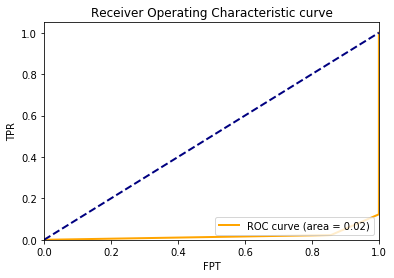

In [64]:
filters = classifier_performance(V, header, X_train_mi_sm, X_test_mi, y_train_mi_sm, y_test_mi)

### Model using using Wrapper Methods

Classifier:  K_Nearest_Neighbors

Accuracy: 0.799 ,Error Rate: 0.201 ,Precision: 1.0 ,Recall: 0.7846 ,F1 Score: 0.8793
 


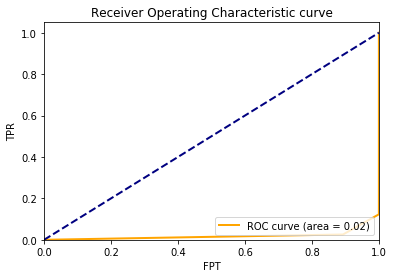

In [65]:
wrappers = classifier_performance(V, header, X_train_sp_sm, X_test_sp, y_train_sp_sm, y_test_sp)

### Model using Embedded Methods

Classifier:  K_Nearest_Neighbors

Accuracy: 0.6388 ,Error Rate: 0.3612 ,Precision: 1.0 ,Recall: 0.6128 ,F1 Score: 0.7599
 


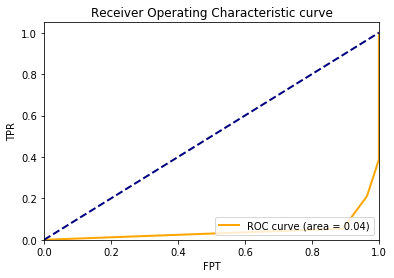

In [66]:
embedded = classifier_performance(V, header, X_train_la_sm, X_test_la, y_train_la_sm, y_test_la)

## Comparison:

In [67]:
filters

[0.7559808612440191,
 0.2440191387559809,
 1.0,
 0.7384615384615385,
 0.8495575221238938]

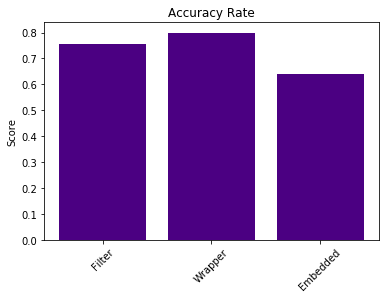

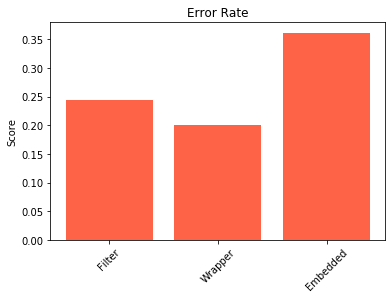

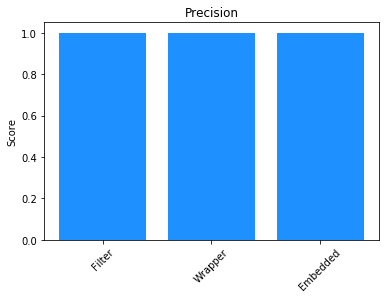

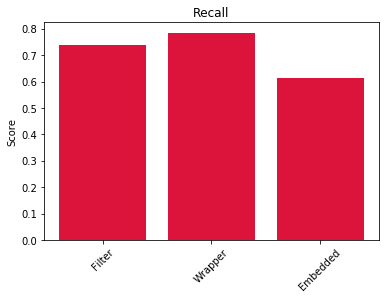

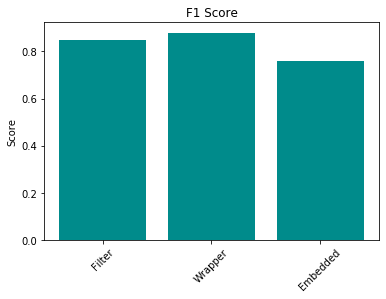

In [68]:
comparison_list = [filters,wrappers,embedded]
names = ['Accuracy Rate','Error Rate','Precision','Recall','F1 Score']
colors = ['indigo', 'tomato', 'dodgerblue', 'crimson', 'darkcyan']
header = ["Filter","Wrapper","Embedded"]    
#Plots of each of the Performance Values for each of the Classifiers in this analysis
for i in range(len(names)):
    x = [item[i] for item in comparison_list]
    plt.bar(header, x, color=colors[i])
    plt.xticks(rotation=45)
    plt.title(names[i])
    plt.ylabel("Score")
    plt.show()

# Summary/Conclusions:

- For this analysis we initially had 590 features + date and the target variable (quality of the diaper as either good or bad). After some cleaning (removing columns with a lot of missing values and columns with the same value repeated in all rows) we ended up with a data frame with 538 features + data + target variable.



- Each feature selection method came with different number of features as seen as follows.

| Method| Number of Features|
| --- | --- |
| Filter Method | 49 |
| Wrapper Method | 20 |
| Embedded Method | 209 |


- In this case it seems that the *Wrapper* feature selection method is the one offering a better selection to model the quality of the diapers by means of the manufacturing process.


- The class imbalance problem was solved my means of re-sampling.

| Target | -1 | 1294 |
| --- | --- | --- |
| Target | 1 | 99 |

- One step forward could be to get in contact with a subject expert matter to explore the features in the data set and get an inside of which ones are critical for the quality of the diaper and simply get more information on the manufacturing process.


- After multiple combination of variables it was seen that the best option for a better ROC & AUC was a simple model with few variables, more on this has to be explored to choose the optimal combination of variables.

# DFD 

- Refine your data understanding and prepare a DFD of solving the manufacturing quality problem.
     - **This will be sent thru email as there is no other place to put it in the submission section for this Milestone**

## Feedback requested:

- When you encounter a data set like this one with 500+ features and no title, how you do a visual exploration to get a better feeling of the data? even a correlation plot would not make a lot of sense as we are talking about 500+ features, so I am looking for other alternatives.
- Is it better to replace missing data for the mean or median if it is around 10% or dropping that is still valid?
- Is there a way to combine the features using PCA in such a way that we can still have the influence of most of the variables embedded in a set of reduced orthogonal features?